## Problem 1

Find a stationary point:

$$
f(x_{1}, x_{2}) = 2x_{1}^2 - 4x_{1}x_{2} + 1.5x_{2}^2 + x_{2}
$$

$$
{df \over dx_{1}} = 4x_{1} - 4x_{2} = 0
$$

$$
{df \over dx_{2}} = -4x_{1} + 3x_{2} +1 = 0
$$

the Hessian $H = \begin{bmatrix} {d^2f \over dx_{1}^2} & {d^2f \over dx_{1}dx_{2}} \\ {d^2f \over dx_{1}dx_{2}} & {d^2f \over dx_{2}^2} \end{bmatrix}$

$$
 \Longrightarrow H = \begin{bmatrix} 4 & -4 \\ -4 & 3 \end{bmatrix}
$$

Find $\lambda:$

$$
H-\lambda I=0
$$

$$
 \Longrightarrow \begin{bmatrix} 4-\lambda & -4 \\ -4 & 3-\lambda \end{bmatrix} = 0
$$

$$
(4-\lambda)(3-\lambda)-16=0
$$

$$
\lambda = {7 \pm \sqrt{65} \over 2}
$$

Which shows that one eigenvalue is positive, and the other is negative, so the Hessian is indefinite, and the stationary point is a saddle.

Taylor's expansion:

$$
f(x_{1},x_{2}) - f(1,1) = f'(1,1)(x_{1}-1,x_{2}-1) + \frac{1}{2}(x_{1}-1,x_{2}-1)^TH(x_{1}-1,x_{2}-1), \;\;\;\;\;f'(1,1)=0
$$

$$
f(x_{1},x_{2}) - f(1,1) = \frac{1}{2}(x_{1}-1,x_{2}-1)^TH(x_{1}-1,x_{2}-1), \;\;\;\;dx_{1}=x_{1}-1; \;dx_{2}=x_{2}-1
$$

$$
= \frac{1}{2}[dx_{1},dx_{2}]^T \begin{bmatrix} 4 & -4 \\ -4 & 3 \end{bmatrix} \begin{bmatrix}dx_{1}\\dx_{2}\end{bmatrix}
$$

$$
= \frac{1}{2}(4dx_{1}^2 - 8dx_{1}x_{2} + 3dx_{2}^2)
$$

$$
= \frac{1}{2}(2dx_{1}-dx_{2})(2dx_{1}-3dx_{2})
$$

Find the directions of downslopes:

$$
\frac{1}{2}(2dx_{1}-dx_{2})(2dx_{1}-3dx_{2}) < 0
$$

Therefore, the downslopes are: 

<font color='red'>
$$
(2dx_{1}-dx_{2})<0 \; and \;(2dx_{1}-3dx_{2}) > 0
$$</font>

$\;\;\;\;\;\;$or

<font color='red'>
$$
(2dx_{1}-dx_{2})>0 \; and \;(2dx_{1}-3dx_{2}) < 0
$$</font>

## Problem 2

### (a)

Minimize the distance from the point (-1, 0, 1): 

$$
f(x_{1}, x_{2}, x_{3}) = (x_{1}+1)^2+x_{2}^2+(x_{3}-1)^2
$$

Subject to:

$$
x_{1}+2x_{2}+3x_{3}=1
$$

In [13]:
import numpy as np
from scipy.optimize import minimize
import pdb

In [22]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return (x1+1)**2+x2**2+(x3-1)**2
def constraint1(x):
    return x[0]+2*x[1]+3*x[2]-1 

In [26]:
x0 = [0, 0, 0]
print(objective(x0))

2


In [27]:
b = (-100.0,100.0)
bnds = (b,b,b)
con1 = {'type': 'eq', 'fun': constraint1}


In [28]:
print(minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=con1))


     fun: 0.07142857142857148
     jac: array([-0.14285713, -0.28571428, -0.42857141])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-1.07142857, -0.14285715,  0.78571429])


Therefore, the solution is $x_{1}=-1.07142857,\;x_{2}=-0.14285715,\;x_{3}=0.78571429.$

<font color='red'>
This is a convex problem since the unconstrained problem has the Hessian that is positive definite everywhere.
</font>

### (b)

$$
f(x_{2}, x_{3}) = (2-2x_{2}-3x_{3})^2+x_{2}^2+(x_{3}-1)^2
$$

$$
\frac{df(x_{2}, x_{3})}{dx_{2}} = 10x_{2}+12x_{3}-8
$$

$$
\frac{df(x_{2}, x_{3})}{dx_{3}} = 12x_{2}+20x_{3}-14
$$

### Gradient descent

In [57]:
# Gradient descent

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress


obj = lambda x: (2 - 2*x[0] - 3*x[1])**2 + x[0]**2 + (x[1]-1)**2     # x[0] = x2; x[1] = x3
def grad(x):
     return np.array([10*x[0] + 12*x[1] - 8, 20*x[1] + 12*x[0] -14])
    
eps = 1e-3  # termination criterion 

x0= np.array([0,0])  # initial guess

k = 0  # counter
soln = [x0]  
x = soln[k]  # initial guess
error = np.linalg.norm(grad(x))  #  gradient norm
a = 0.01  # a fixed step size 

# Inexact line search
def line_search(x, d):  # d: search direction
    a = 1.  # initialize step size
    
    def phi(a,x,d):
        return obj(x)+a*0.8*np.dot(grad(x),d)

    while phi(a,x,d)<obj(x+a*d): 
        a = 0.5*a
        
    return a

while error >= eps:  
    d = -grad(x)
    
    a = line_search(x, d)
    
    x = x+a*d
    soln.append(x)
    error = np.linalg.norm(grad(x))

soln


[array([0, 0]),
 array([0.0625  , 0.109375]),
 array([0.10986328, 0.19580078]),
 array([0.14542389, 0.26428223]),
 array([0.17178619, 0.31872964]),
 array([0.19098449, 0.36219818]),
 array([0.20460775, 0.39707492]),
 array([0.21389699, 0.42522498]),
 array([0.2257459 , 0.47098649]),
 array([0.22716314, 0.50022586]),
 array([0.22287655, 0.52006219]),
 array([0.20820431, 0.54894461]),
 array([0.124532  , 0.61427662]),
 array([0.08599204, 0.62803184]),
 array([0.03645422, 0.67896418]),
 array([0.02045071, 0.67844123]),
 array([-0.02277453,  0.70166208]),
 array([-0.03478701,  0.71666537]),
 array([-0.05054416,  0.72192391]),
 array([-0.06039699,  0.73242714]),
 array([-0.08354146,  0.74195478]),
 array([-0.0856678 ,  0.74706109]),
 array([-0.09917469,  0.75791006]),
 array([-0.10562305,  0.7599035 ]),
 array([-0.10953627,  0.76424141]),
 array([-0.11897805,  0.76794228]),
 array([-0.11977577,  0.77009513]),
 array([-0.12519875,  0.77452096]),
 array([-0.12784025,  0.77526882]),
 array([-0

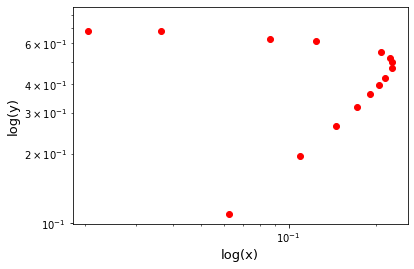

In [62]:
x = [sol[0][0],sol[1][0],sol[2][0],sol[3][0],sol[4][0],sol[5][0],sol[6][0],sol[7][0],sol[8][0],
     sol[9][0],sol[10][0],sol[11][0],sol[12][0],sol[13][0],sol[14][0],sol[15][0],sol[16][0],sol[17][0],
     sol[18][0],sol[19][0],sol[20][0],sol[21][0],sol[22][0],sol[23][0],sol[24][0],sol[25][0],sol[26][0],
     sol[27][0],sol[28][0],sol[29][0],sol[30][0],sol[31][0],sol[32][0],sol[33][0],sol[34][0],sol[35][0],
     sol[36][0],sol[37][0],sol[38][0],sol[39][0],sol[40][0],sol[41][0],sol[42][0],sol[43][0],sol[44][0],
     sol[45][0],sol[46][0],sol[47][0],sol[48][0],sol[49][0]]

y = [sol[0][1],sol[1][1],sol[2][1],sol[3][1],sol[4][1],sol[5][1],sol[6][1],sol[7][1],sol[8][1],
     sol[9][1],sol[10][1],sol[11][1],sol[12][1],sol[13][1],sol[14][1],sol[15][1],sol[16][1],sol[17][1],
     sol[18][1],sol[19][1],sol[20][1],sol[21][1],sol[22][1],sol[23][1],sol[24][1],sol[25][1],sol[26][1],
     sol[27][1],sol[28][1],sol[29][1],sol[30][1],sol[31][1],sol[32][1],sol[33][1],sol[34][1],sol[35][1],
     sol[36][1],sol[37][1],sol[38][1],sol[39][1],sol[40][1],sol[41][1],sol[42][1],sol[43][1],sol[44][1],
     sol[45][1],sol[46][1],sol[47][1],sol[48][1],sol[49][1]]

plt.loglog(x, y, 'ro')
plt.xlabel('log(x)', fontsize=13)
plt.ylabel('log(y)', fontsize=13)

plt.show()


As for _Newton's Method_, I attached its coding file and plot seperately on my Github.

The result of Newton's Method from Command Window in Matlab:

***************************************************************
Initial objective function value: 98

Minimum finally reached! 

Number of iterations for convergence: 2

The minimum: [-1.428571e-01,7.857143e-01]

    Iterations       X_coordinate         Y_coordinate   
    __________    __________________    _________________

        1                          3                   -4
        2         -0.142857142857143    0.785714285714286
        
***************************************************************


It seems that Newton's Method can have a much faster convergence than Gradient Descent. Since Newton's Method can optimize much faster, it may have a much higher cost. 

## Problem 3

A hyperplane in $\mathbb{R}^n$ can be expressed as: $\;a^Tx=c\;$ for $\;x \ni \mathbb{R}^n$

We want to show that these two points, $x_{1}$ and $x_{2}$ on the hyperplane in $\mathbb{R}^n$ can be joined by a line segment between them:

$$
x = \lambda x_{1}+(1-\lambda)x_{2}, \;\;\; \lambda \longleftarrow [0, 1]
$$

$$
a^Tx=a^T(\lambda x_{1}+(1-\lambda)x_{2})
$$

$$
a^Tx=\lambda a^Tx_{1}+(1-\lambda)a^Tx_{2}
$$

$$
a^Tx=\lambda c+(1-\lambda)c
$$

$$
a^Tx=(\lambda+1-\lambda) c
$$

<font color='red'>
$$
a^Tx=c
$$
    </font>

Therefore, it proves that a hyperplane is indeed a convex set since x lies on the hyperplane.

## Problem 4

The problem:

$$
\min \limits _{p} \; \sum \limits _{k=1}^{m} (a_{k}^Tp-I_{t})^2
$$

The Hessian of the function:

$$
H = 2 \sum \limits _{k=1}^{m} a_{k}a_{k}^T
$$

### (a)

The problem is convex since the function is subject to the simple bound constraints, $0 \leq p_{i} \leq p_{max}$, and $H \geq$ 0 (p.s.d).

### (b)

The constraint added: $\;\sum \limits _{k=1}^{n} p_{i} \leq p* $, $\;n=10$

The problem will have a unique solution since the problem having a convex feasible domain does not change after adding this linear constraint in $p$.

### (c)

The constraint added: $\;\sum \limits _{k=1}^{10} true(p_{i} > 0) \leq 10 \;\;$

If $false$, the problem would be non-convex.

In this case, n = 10. The problem has a unique solution when these 10 instances in total occur:<br>  $(p_{1},p_{2},p_{3},p_{4},p_{5},p_{6},p_{7},p_{8},p_{9},p_{10}) = (10,0,0,0,0,0,0,0,0,0)$,<br>  $(p_{1},p_{2},p_{3},p_{4},p_{5},p_{6},p_{7},p_{8},p_{9},p_{10}) = (0,10,0,0,0,0,0,0,0,0)$  $...$ and <br> $(p_{1},p_{2},p_{3},p_{4},p_{5},p_{6},p_{7},p_{8},p_{9},p_{10}) = (0,0,0,0,0,0,0,0,0,10)$, meaning that one lamp is on and the other off.

## Problem 5

$$
c^*(y)= \max \limits _{x}[xy-c(x)]
$$

$$
= \max \limits _{x}[x_{1}y-c(x_{1}), x_{2}y-c(x_{2}), ..., x_{n}y-c(x_{n})]
$$

When $c^*(y)$ is derivative twice with respect to y, then:

$$
c^*(y) = \max \limits _{x}[0, 0, ..., 0]
$$

Therefore, the Hessian is equal to zero and positive semi-definite, showing that $c^*(y)$ is a convex function with respect to y.